# **🍽️ Restaurant Tips Analysis**

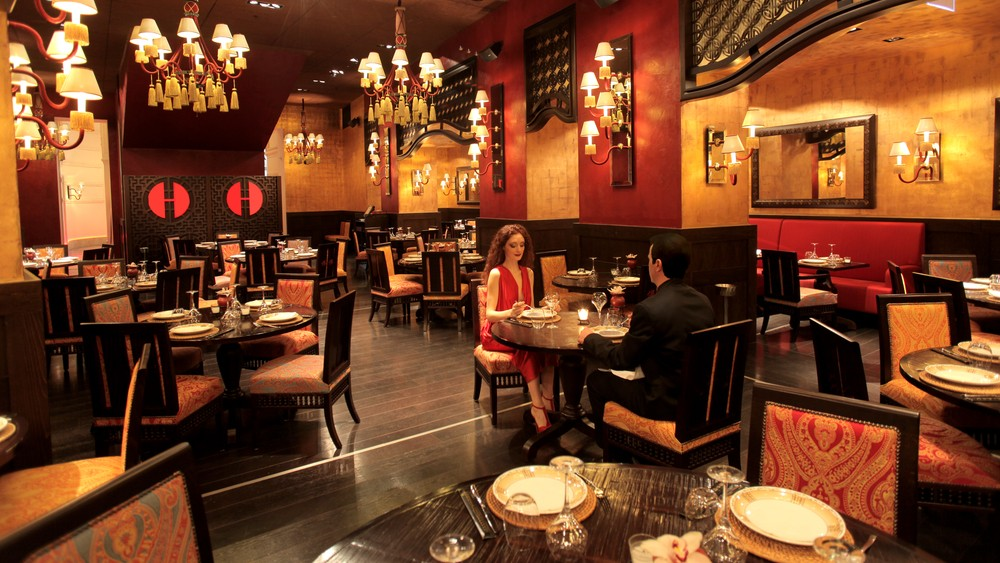

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [44]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [45]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [109]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [47]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

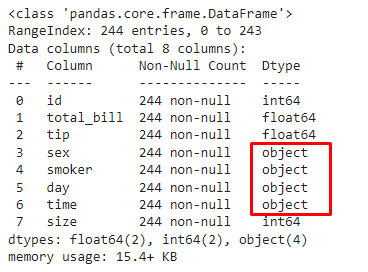

Let's fix their types and make them string:

In [48]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [49]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [50]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [54]:
# PUT YOUR CODE HERE
smokers_df = df.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [55]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
204,204,20.53,4.0,Male,Yes,Thur,Lunch,4
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2
72,72,26.86,3.14,Female,Yes,Sat,Dinner,2
192,192,28.44,2.56,Male,Yes,Thur,Lunch,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [56]:
# PUT YOUR CODE HERE
non_smokers_df = df.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [57]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
115,115,17.31,3.5,Female,No,Sun,Dinner,2
23,23,39.42,7.58,Male,No,Sat,Dinner,4
19,19,20.65,3.35,Male,No,Sat,Dinner,3
8,8,15.04,1.96,Male,No,Sun,Dinner,2
150,150,14.07,2.5,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [58]:
# YOUR CODE
common_tip_min = df.tip.min()
common_tip_max = df.tip.max()
common_tip_mean = df.tip.mean()
common_tip_median = df.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [59]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [60]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [61]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [62]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [63]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [64]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Consistency in Minimum and Maximum Tips: All three groups ("Common," "Smokers," and "Non-smokers") show a remarkably consistent minimum tip of 1.00000 and a maximum tip of 10.00000 (for Common and Smokers) or 9.00000 (for Non-smokers). This suggests that across all categories, there's a similar floor for tipping and a generally high ceiling, although non-smokers have a slightly lower observed maximum tip.
2. Similar Average Tip Amounts: The mean tip amounts are very close for all three groups: 2.990279 for "Common," 3.00871 for "Smokers," and 2.991854 for "Non-smokers." This indicates that, on average, the amount tipped does not significantly differ between these groups.
3. Median Tips Show Little Variation: The median tip values also exhibit minimal variation: 2.900000 for "Common," 3.000000 for "Smokers," and 2.740000 for "Non-smokers." This further supports the idea that the central tendency of tip amounts is quite similar across all categories. The slightly lower median for non-smokers (2.74) compared to smokers (3.00) and common (2.90) might be worth exploring further with more data.
4. No Strong Indication of Tipping Disparity: Overall, the measures of central tendency (min, max, mean, median) suggest that there isn't a significant disparity in tipping behavior based on smoking status. While there are minor differences, particularly in the maximum and median for "Non-smokers," these do not point to any strong trend where one group consistently tips substantially more or less than the others.

***General conclusion:***

**Similar Tipping Behavior:** Based on measures of central tendency (minimum, maximum, mean, and median values), it can be concluded that the tipping behavior of the "Common," "Smokers," and "Non-smokers" groups shows significant similarity. There are no clear differences in the average or typical tip amounts among these groups.

**Similar Tipping Ranges:** All three groups have very close minimum and maximum tip values. This indicates that regardless of who they are, they tend to tip from a similar floor and have the potential to tip up to a similar ceiling, although the non-smoker group has a slightly lower observed maximum tip.

**No Apparent Discrimination in Tipping Based on Smoking Status:** While there are minor differences, particularly in the maximum and median values for the "Non-smokers" group, these differences are not significant enough to conclude that smoking status substantially influences tipping behavior. This suggests that customers' tendency to tip may be independent of their smoking habits, or that other factors (e.g., service quality, total bill, personal mood) may influence tipping behavior more than smoking status.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

Text(0.5, 0, 'Tip value')

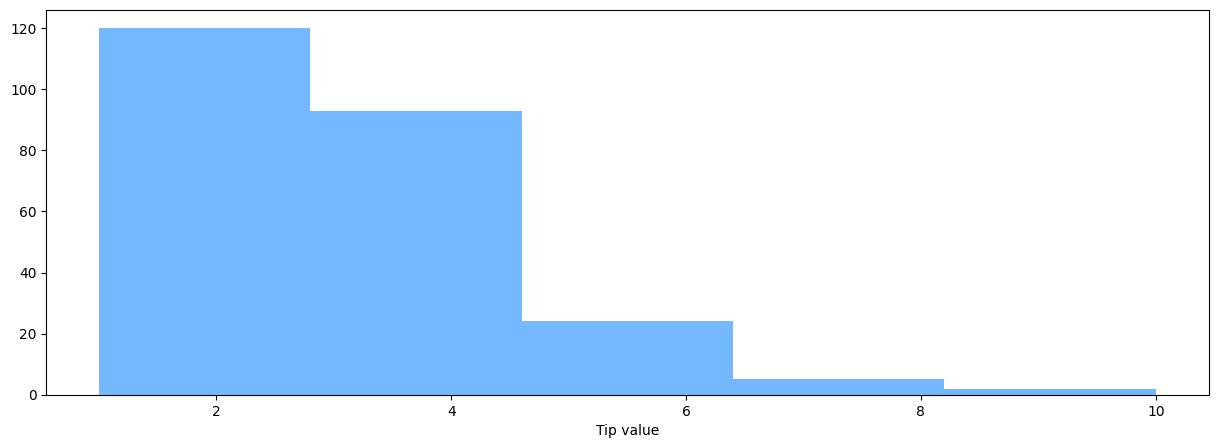

In [70]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins=5, color='#74b9ff')
plt.xlabel('Tip value')

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

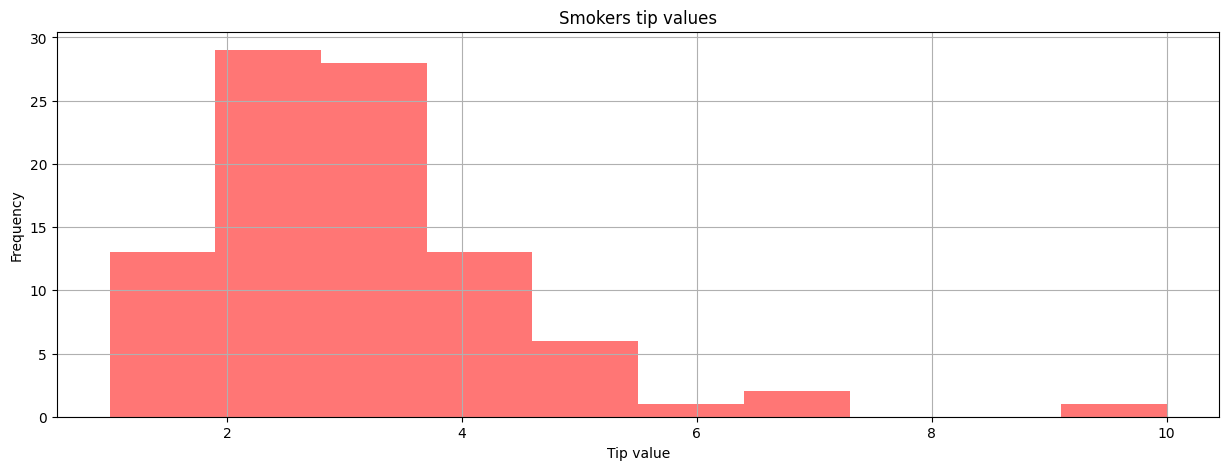

In [79]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df.tip, bins=10, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

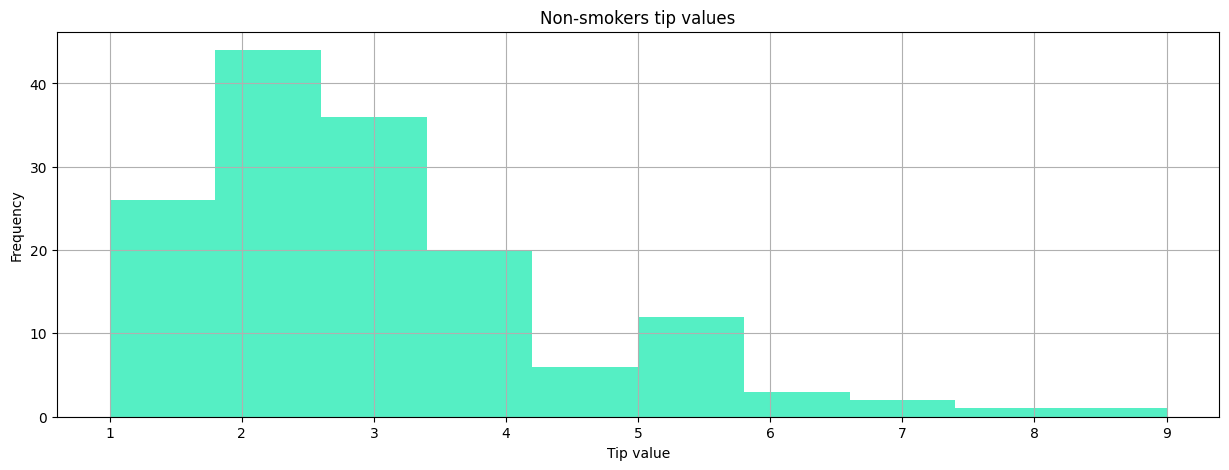

In [82]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df.tip, bins=10, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

Text(0.5, 0, 'Non-smokers tip value')

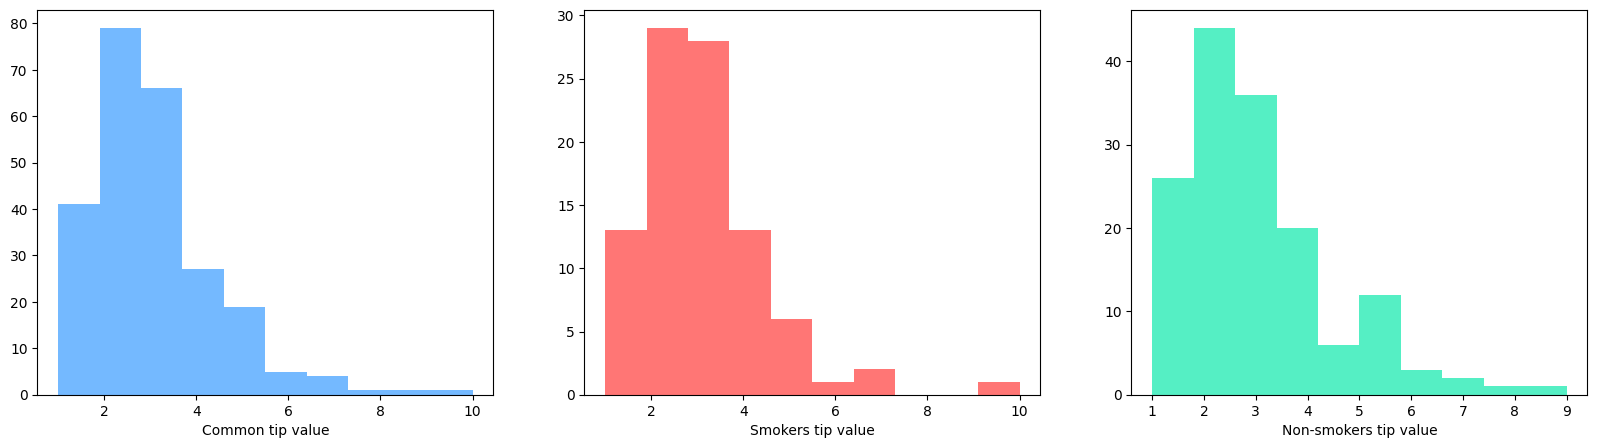

In [85]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].hist(df.tip, bins=10, color='#74b9ff')
axis[0].set_xlabel('Common tip value')
axis[1].hist(smokers_df.tip, bins=10, color='#ff7675')
axis[1].set_xlabel('Smokers tip value')
axis[2].hist(non_smokers_df.tip, bins=10, color='#55efc4')
axis[2].set_xlabel('Non-smokers tip value')

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Phần lớn các khoản boa đều nhỏ: Cả ba biểu đồ đều cho thấy một xu hướng chung là phần lớn các khoản boa tập trung ở mức thấp, chủ yếu là dưới 4-5 đô la. Số lượng các khoản boa lớn (trên 6-7 đô la) giảm đáng kể và trở nên rất hiếm hoi. Điều này cho thấy khách hàng thường có xu hướng boa một số tiền nhỏ, phổ biến hơn là các khoản boa lớn.

2. Đỉnh phân bố tập trung ở mức thấp:
- **Nhóm "Chung" (Common):** Biểu đồ cho thấy đỉnh cao nhất nằm trong khoảng giá trị boa từ 2 đến dưới 4 đô la, với khoảng 70-80 giao dịch.
- **Nhóm "Người hút thuốc" (Smokers):** Phân bố boa của người hút thuốc có đỉnh rõ rệt nhất trong khoảng từ 2 đến dưới 4 đô la, đặc biệt là khoảng 2-3 đô la, với tần suất rất cao (gần 30 giao dịch).
- **Nhóm "Người không hút thuốc" (Non-smokers):** Đỉnh của nhóm này cũng nằm trong khoảng từ 2 đến dưới 4 đô la, với tần suất cao nhất khoảng 45 giao dịch ở khoảng 2-3 đô la.

**General conclusion:**
Dữ liệu cho thấy hành vi boa tiền của người hút thuốc và người không hút thuốc là rất tương đồng về cả số tiền trung bình và cách phân bố các khoản boa. Các yếu tố khác ngoài thói quen hút thuốc có vẻ ảnh hưởng đến số tiền boa nhiều hơn.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [86]:
male_df = df.query('sex == "Male"')
female_df = df.query('sex == "Female"')

In [90]:
male_tip_min = male_df.tip.min()
male_tip_max = male_df.tip.max()
male_tip_mean = male_df.tip.mean()
male_tip_median = male_df.tip.median()

female_tip_min = female_df.tip.min()
female_tip_max = female_df.tip.max()
female_tip_mean = female_df.tip.mean()
female_tip_median = female_df.tip.median()

# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct


,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [91]:
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [92]:
all_vals_dict_sex = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct_sex = pd.DataFrame(all_vals_dict_sex)
# Output the dataframe
all_mct_sex

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insight:**
1. Giá trị boa trung bình (mean):

- Nam giới (Male): 3.089618
- Nữ giới (Female): 2.833448
- Nhận xét: Nam giới có giá trị boa trung bình cao hơn nữ giới một chút (khoảng 0.25 đô la).
2. Giá trị boa trung vị (median):

- Nam giới (Male): 3.000000
- Nữ giới (Female): 2.750000
- Nhận xét: Giá trị boa trung vị của nam giới cũng cao hơn nữ giới (khoảng 0.25 đô la). Điều này củng cố nhận định rằng điểm giữa của phân bố boa của nam giới cao hơn nữ giới.
3. Giá trị boa tối thiểu (min): Cả nam và nữ đều có giá trị boa tối thiểu là 1.000000, cho thấy điểm xuất phát thấp nhất trong hành vi boa là giống nhau.

4. Giá trị boa tối đa (max):

- Nam giới (Male): 10.000000
- Nữ giới (Female): 6.500000
- Nhận xét: Nam giới có khả năng boa một số tiền tối đa cao hơn đáng kể so với nữ giới. Điều này cho thấy trong tập dữ liệu này, những người boa rất lớn tiền hầu hết là nam giới.

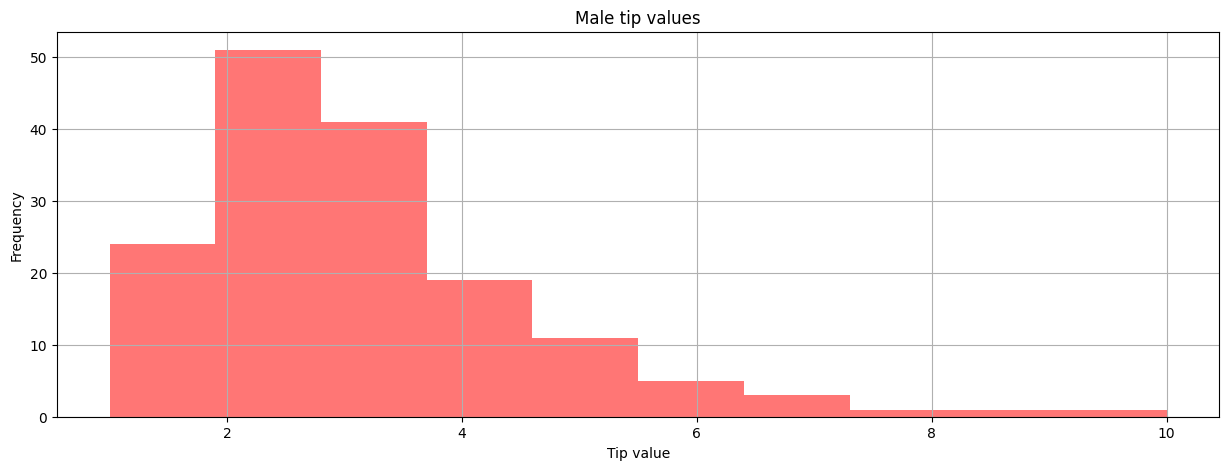

In [94]:
plt.figure(figsize=(15, 5))
plt.hist(male_df.tip, bins=10, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male tip values')
plt.grid(True)

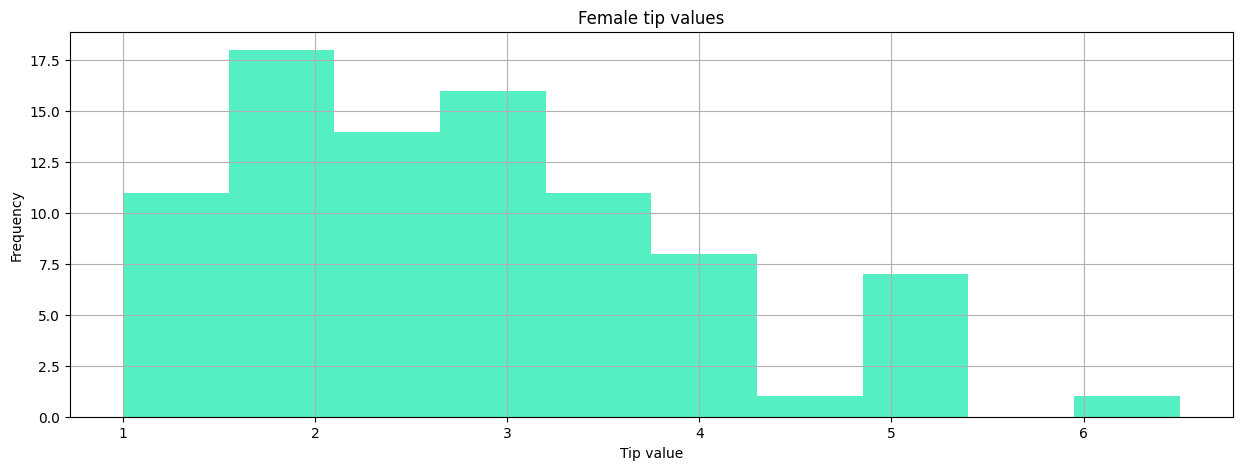

In [95]:
plt.figure(figsize=(15, 5))
plt.hist(female_df.tip, bins=10, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')
plt.grid(True)

Text(0.5, 0, 'Female tip value')

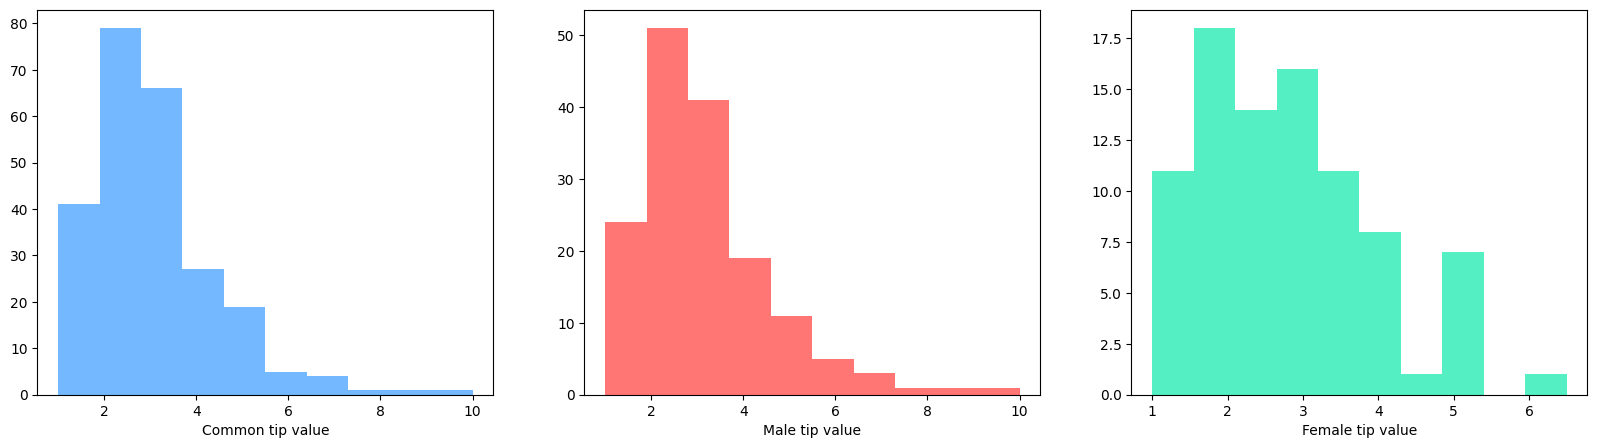

In [96]:
figure, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].hist(df.tip, bins=10, color='#74b9ff')
axis[0].set_xlabel('Common tip value')
axis[1].hist(male_df.tip, bins=10, color='#ff7675')
axis[1].set_xlabel('Male tip value')
axis[2].hist(female_df.tip, bins=10, color='#55efc4')
axis[2].set_xlabel('Female tip value')

**General conclusion:**

Nam giới có xu hướng boa tiền nhiều hơn một chút so với nữ giới.

Nam giới có giá trị boa trung bình và trung vị cao hơn nữ giới.
Nam giới có khả năng boa các khoản tiền tối đa lớn hơn đáng kể so với nữ giới.
Tuy nhiên, cần lưu ý rằng sự khác biệt về giá trị trung bình và trung vị là tương đối nhỏ (khoảng 0.25 đô la). Điều này gợi ý rằng mặc dù nam giới có thể boa nhiều hơn một chút về mặt thống kê, sự khác biệt này có thể không quá lớn trong bối cảnh thực tế của hành vi boa tiền nói chung, nơi mà cả hai giới đều có xu hướng boa các khoản tiền tương đối nhỏ.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [99]:
sun_df = df.query('day == "Sun"')
sat_df = df.query('day == "Sat"')

In [100]:
sun_tip_min = sun_df.tip.min()
sun_tip_max = sun_df.tip.max()
sun_tip_mean = sun_df.tip.mean()
sun_tip_median = sun_df.tip.median()

sat_tip_min = sat_df.tip.min()
sat_tip_max = sat_df.tip.max()
sat_tip_mean = sat_df.tip.mean()
sat_tip_median = sat_df.tip.median()

# Make a list of values
sun_values = [sun_tip_min, sun_tip_max, sun_tip_mean, sun_tip_median]
# Round all the values to 4 decimal places
sun_values = map(lambda x: round(x, 4), sun_values)

# Make a dataframe from the list
sun_mct = pd.DataFrame(sun_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
sun_mct

,0
min,1.0100
max,6.5000
mean,3.2551
median,3.1500


In [101]:
# Make a list of values
sat_values = [sat_tip_min, sat_tip_max, sat_tip_mean, sat_tip_median]
# Round all the values to 4 decimal places
sat_values = map(lambda x: round(x, 4), sat_values)

# Make a dataframe from the list
sat_mct = pd.DataFrame(sat_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
sat_mct

,0
min,1.0000
max,10.0000
mean,2.9931
median,2.7500


In [102]:
all_vals_dict_day = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Sun': {'min': sun_tip_min, 'max': sun_tip_max, 'mean': sun_tip_mean, 'median': sun_tip_median},
    'Sat': {'min': sat_tip_min, 'max': sat_tip_max, 'mean': sat_tip_mean, 'median': sat_tip_median}
}

# Make a dataframe
all_mct_day = pd.DataFrame(all_vals_dict_day)
# Output the dataframe
all_mct_day

,Common,Sun,Sat
min,1.000000,1.010000,1.000000
max,10.000000,6.500000,10.000000
mean,2.998279,3.255132,2.993103
median,2.900000,3.150000,2.750000


**Insight:**
1. Giá trị boa trung bình (mean):

- Chung (Common): 2.998279
- Chủ Nhật (Sun): 3.255132
- Thứ Bảy (Sat): 2.993103
- Nhận xét: Giá trị boa trung bình vào Chủ Nhật cao hơn đáng kể so với Thứ Bảy và mức trung bình chung. Thứ Bảy có giá trị trung bình rất gần với mức chung.
Giá trị boa trung vị (median):

2. Chung (Common): 2.900000
- Chủ Nhật (Sun): 3.150000
- Thứ Bảy (Sat): 2.750000
- Nhận xét: Giá trị boa trung vị vào Chủ Nhật cũng cao hơn so với Thứ Bảy và mức chung. Giá trị trung vị vào Thứ Bảy lại thấp hơn một chút so với mức chung.
Giá trị boa tối thiểu (min): Các ngày đều có mức boa tối thiểu rất gần nhau (khoảng 1 đô la).

3. Giá trị boa tối đa (max):

- Chung (Common): 10.000000
- Chủ Nhật (Sun): 6.500000
- Thứ Bảy (Sat): 10.000000
- Nhận xét: Điều thú vị là Chủ Nhật có mức boa tối đa thấp hơn đáng kể so với Thứ Bảy và mức chung. Điều này có thể gợi ý rằng vào Chủ Nhật, ít có những khoản boa cực lớn, dù giá trị trung bình lại cao hơn.

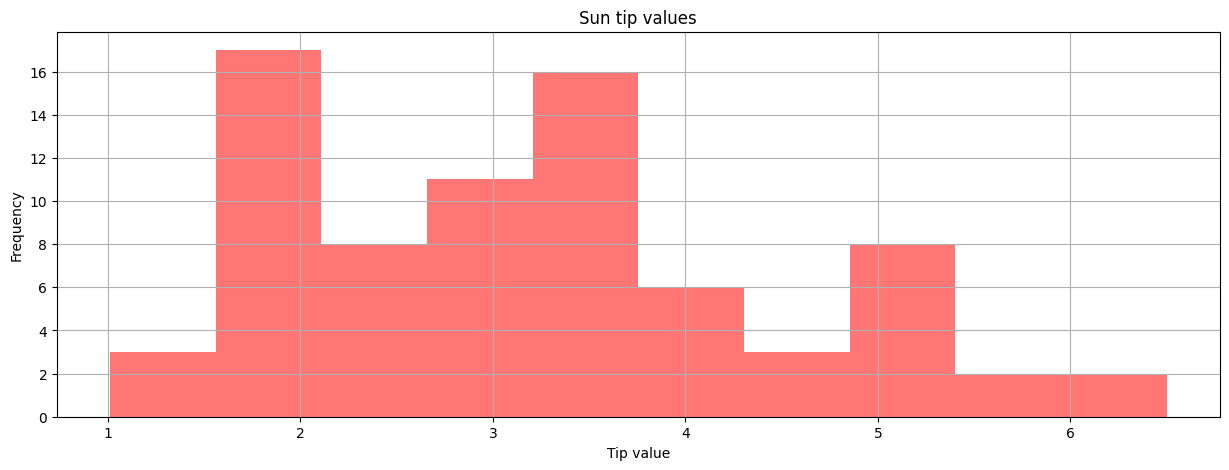

In [103]:
plt.figure(figsize=(15, 5))
plt.hist(sun_df.tip, bins=10, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Sun tip values')
plt.grid(True)

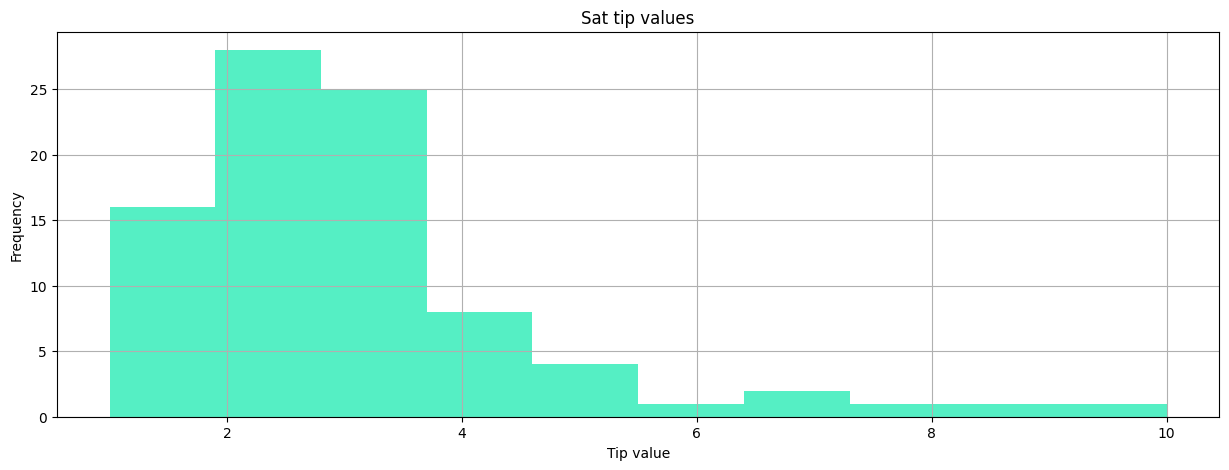

In [104]:
plt.figure(figsize=(15, 5))
plt.hist(sat_df.tip, bins=10, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Sat tip values')
plt.grid(True)

Text(0.5, 0, 'Sat tip value')

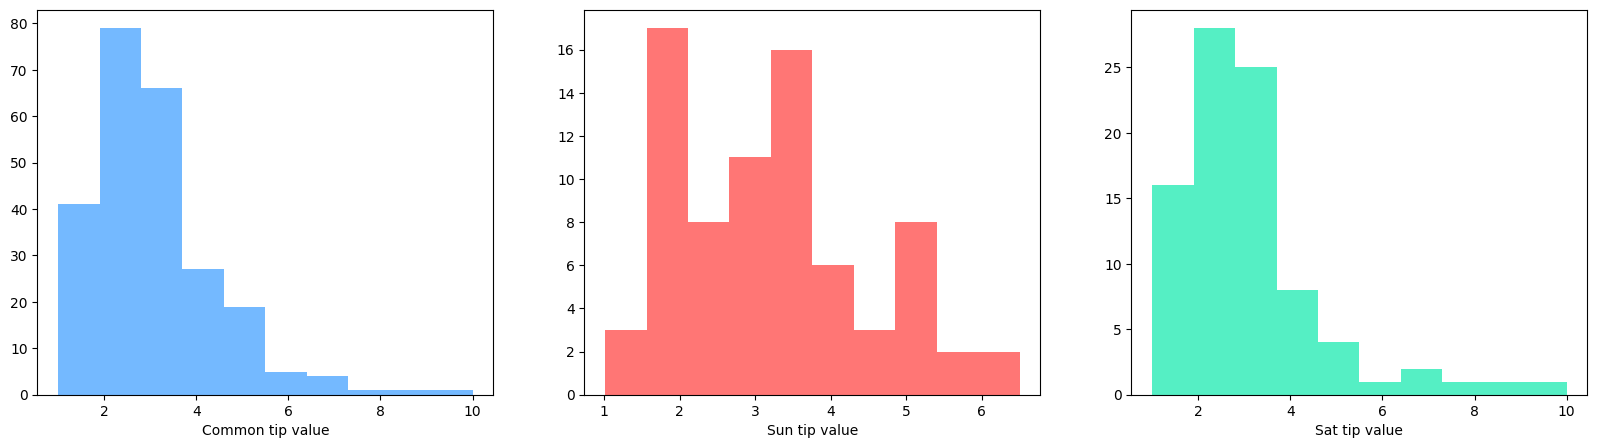

In [105]:
figure, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].hist(df.tip, bins=10, color='#74b9ff')
axis[0].set_xlabel('Common tip value')
axis[1].hist(sun_df.tip, bins=10, color='#ff7675')
axis[1].set_xlabel('Sun tip value')
axis[2].hist(sat_df.tip, bins=10, color='#55efc4')
axis[2].set_xlabel('Sat tip value')

**General conclusion:**

Có sự khác biệt trong hành vi boa tiền vào các ngày cuối tuần. Chủ Nhật có xu hướng mang lại tiền boa trung bình và trung vị cao hơn. Tuy nhiên, Thứ Bảy không nhất thiết mang lại nhiều tiền boa hơn về mặt trung bình, mặc dù nó có thể có những khoản boa cực lớn không thấy vào Chủ Nhật. Điều này gợi ý rằng "cuối tuần" không đồng nghĩa với việc "nhiều tiền boa hơn" một cách đồng nhất; Chủ Nhật có vẻ là ngày mang lại lợi nhuận cao hơn về tiền boa trung bình.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [126]:
time_df = df.query('time == "Dinner"')

In [116]:
time_tip_min = time_df.tip.min()
time_tip_max = time_df.tip.max()
time_tip_mean = time_df.tip.mean()
time_tip_median = time_df.tip.median()

# Make a list of values
time_values = [time_tip_min, time_tip_max, time_tip_mean, time_tip_median]
# Round all the values to 4 decimal places
time_values = map(lambda x: round(x, 4), time_values)

# Make a dataframe from the list
time_mct = pd.DataFrame(time_values, index=['min', 'max', 'mean', 'median'])

all_vals_dict_time = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Time': {'min': time_tip_min, 'max': time_tip_max, 'mean': time_tip_mean, 'median': time_tip_median},
}

# Make a dataframe
all_mct_time = pd.DataFrame(all_vals_dict_time)
# Output the dataframe
all_mct_time

,Common,Time
min,1.000000,1.00000
max,10.000000,10.00000
mean,2.998279,3.10267
median,2.900000,3.00000


**Insight:**
1. Giá trị boa trung bình (mean):

- Chung (Common): 2.998279
- Bữa tối (Time - Dinner): 3.102670
- Nhận xét: Giá trị boa trung bình cho bữa tối cao hơn một chút so với giá trị boa trung bình chung (khoảng 0.1 đô la).
2. Giá trị boa trung vị (median):

- Chung (Common): 2.900000
- Bữa tối (Time - Dinner): 3.000000
- Nhận xét: Giá trị boa trung vị cho bữa tối cũng cao hơn một chút so với mức chung (khoảng 0.1 đô la).
3. Giá trị boa tối thiểu (min): Cả hai đều có mức boa tối thiểu là 1.000000.

4. Giá trị boa tối đa (max): Cả hai đều có mức boa tối đa là 10.000000, cho thấy khả năng nhận được các khoản boa rất lớn là như nhau.

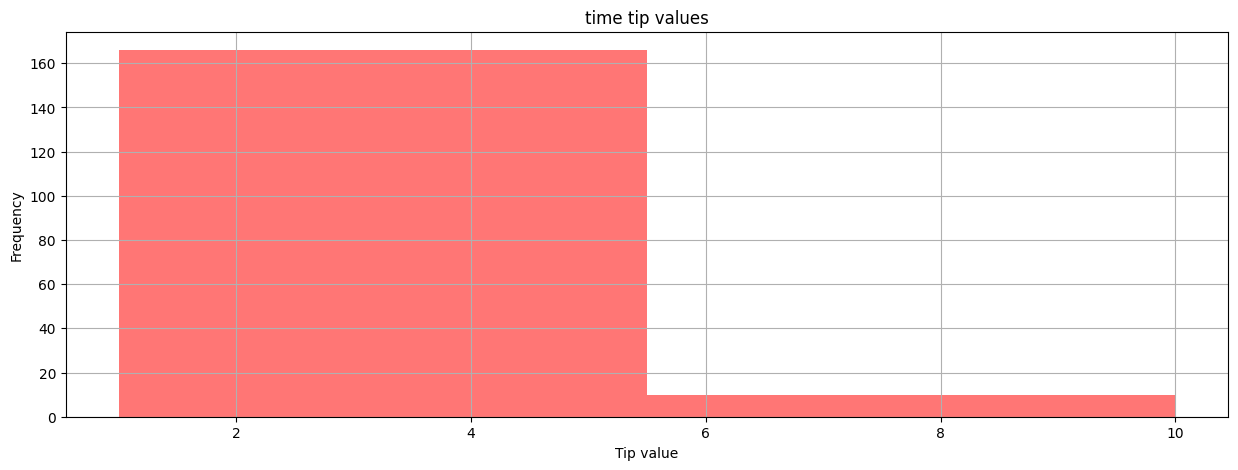

In [123]:
plt.figure(figsize=(15, 5))
plt.hist(time_df.tip, bins=2, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('time tip values')
plt.grid(True)

Text(0.5, 0, 'Time tip value')

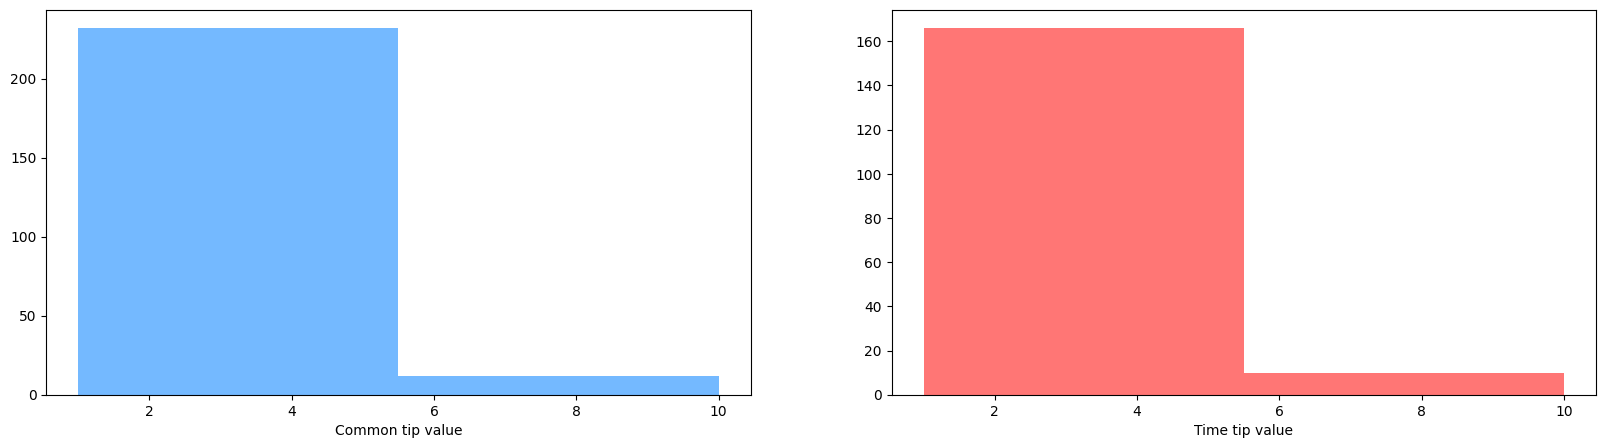

In [122]:
figure, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].hist(df.tip, bins=2, color='#74b9ff')
axis[0].set_xlabel('Common tip value')
axis[1].hist(time_df.tip, bins=2, color='#ff7675')
axis[1].set_xlabel('Time tip value')

**General conclusion**

Tiền boa trong các bữa tối có xu hướng cao hơn một chút so với mức boa chung, nhưng sự khác biệt này là khá khiêm tốn.